In [1]:
#importing important libraries
import os
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from tabulate import tabulate
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#HELPER FUNCTIONS FOR PREPROCESSING DATA

def replaceNullValAppropriately(dataset):
    skewed_cols = []
    non_skewed_cols = []
    for col in dataset.columns:
        if col=='RainToday':
            continue
        if abs(skew(dataset[col].dropna())) > 1.0:
            skewed_cols.append(col)
        else:
            non_skewed_cols.append(col)

    if 'RainToday' in skewed_cols:
        skewed_cols.remove('RainToday')
    if 'RainToday' in non_skewed_cols:
        non_skewed_cols.remove('RainToday')
    # dataset['RainToday'] = [None if math.isnan(x) else x for x in dataset['RainToday']]
    dataset[skewed_cols] = dataset[skewed_cols].fillna(dataset[skewed_cols].median())
    dataset[non_skewed_cols] = dataset[non_skewed_cols].fillna(dataset[non_skewed_cols].mean())
    return dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

def return_int_columns(dataset):
    selected_columns = []
    for column in dataset.columns:
        if not dataset[column].apply(lambda x: isinstance(x, str)).any():
            selected_columns.append(column)
    return dataset[selected_columns]


In [4]:
def check_missing_value(dataset):
    # Show the summary statistics of the dataset
    summary_stats = dataset.describe().transpose()
    print("Summary Statistics:")
    print(tabulate(summary_stats, headers="keys", tablefmt="psql"))
    print()

    # Show the number of missing values for each column in the dataset
    missing_values = dataset.isnull().sum().to_frame(name="Missing Values")
    print("Missing Values:")
    print(tabulate(missing_values, headers="keys", tablefmt="psql"))

In [5]:
def calculate_spearman_corr(dataset, target_variable):
    # This function calculates the Spearman correlation between each variable and the target variable.
    df_corr = pd.DataFrame({'features': dataset.columns})
    df_corr['spearman'] = [dataset[c].corr(dataset[target_variable], method='spearman') for c in dataset.columns]
    df_corr = df_corr.sort_values('spearman')
    return df_corr

In [6]:
def plot_spearman_corr(df_corr):
    # This function plots the Spearman correlation for each variable.
    plt.figure(figsize=(6, 0.25 * len(df_corr)))
    sns.barplot(data=df_corr, y='features', x='spearman', orient='h')
    plt.show()

In [7]:
def spearman_corr(dataset):
    # This function analyzes the Spearman correlation between each variable and three different target variables.
    target_variables = ['Rainfall']
    for target_variable in target_variables:
        df_corr = calculate_spearman_corr(dataset, target_variable)
        plot_spearman_corr(df_corr)

In [8]:
def pearson_corr_heatmap(dataset):
    """
    This function is used to analyze the pearson correlation between each variable including the target variable.
    Generally to reduce confounding, only variables uncorrelated with each other should be added to regression models.
    """

    correlation_matrix = dataset.corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.savefig('pearson_corr_heatmap.png', bbox_inches='tight')
    plt.show()

In [9]:
def convert_wind_direction(dataset):
    directions = {
        'N': 0,
        'NNE': 22.5,
        'NE': 45,
        'ENE': 67.5,
        'E': 90,
        'ESE': 112.5,
        'SE': 135,
        'SSE': 157.5,
        'S': 180,
        'SSW': 202.5,
        'SW': 225,
        'WSW': 247.5,
        'W': 270,
        'WNW': 292.5,
        'NW': 315,
        'NNW': 337.5
    }

    # Apply the conversion using map()
    dataset['WindGustDir_num'] = dataset['WindGustDir'].map(directions)
    dataset['WindDir9am_num'] = dataset['WindDir9am'].map(directions)
    dataset['WindDir3pm_num'] = dataset['WindDir3pm'].map(directions)
    dataset['RainTodayNum'] = dataset['RainToday'].str.lower().map({'yes': 1, 'no': 0})
    dataset['RainTomorrowNum'] = dataset['RainTomorrow'].str.lower().map({'yes': 1, 'no': 0})
    dataset['location_encoded'], _ = pd.factorize(dataset['Location'])
    return dataset

In [10]:
# STATISTICAL DATA VIEW

data_visualize = pd.read_csv('weatherAUS.csv')
check_missing_value(data_visualize)

Summary Statistics:
+---------------+---------+------------+----------+-------+--------+--------+--------+--------+
|               |   count |       mean |      std |   min |    25% |    50% |    75% |    max |
|---------------+---------+------------+----------+-------+--------+--------+--------+--------|
| MinTemp       |  143975 |   12.194   |  6.39849 |  -8.5 |    7.6 |   12   |   16.9 |   33.9 |
| MaxTemp       |  144199 |   23.2213  |  7.11905 |  -4.8 |   17.9 |   22.6 |   28.2 |   48.1 |
| Rainfall      |  142199 |    2.36092 |  8.47806 |   0   |    0   |    0   |    0.8 |  371   |
| Evaporation   |   82670 |    5.46823 |  4.1937  |   0   |    2.6 |    4.8 |    7.4 |  145   |
| Sunshine      |   75625 |    7.61118 |  3.78548 |   0   |    4.8 |    8.4 |   10.6 |   14.5 |
| WindGustSpeed |  135197 |   40.0352  | 13.6071  |   6   |   31   |   39   |   48   |  135   |
| WindSpeed9am  |  143693 |   14.0434  |  8.91538 |   0   |    7   |   13   |   19   |  130   |
| WindSpeed3pm  |  1

### MANIPULATE WIND DIRECTION TO INT FOR THE FETURE ENGINEERING

---



In [11]:
actual_data = data_visualize
data_visualize = convert_wind_direction(data_visualize)

In [12]:
data_visualize = return_int_columns(data_visualize)

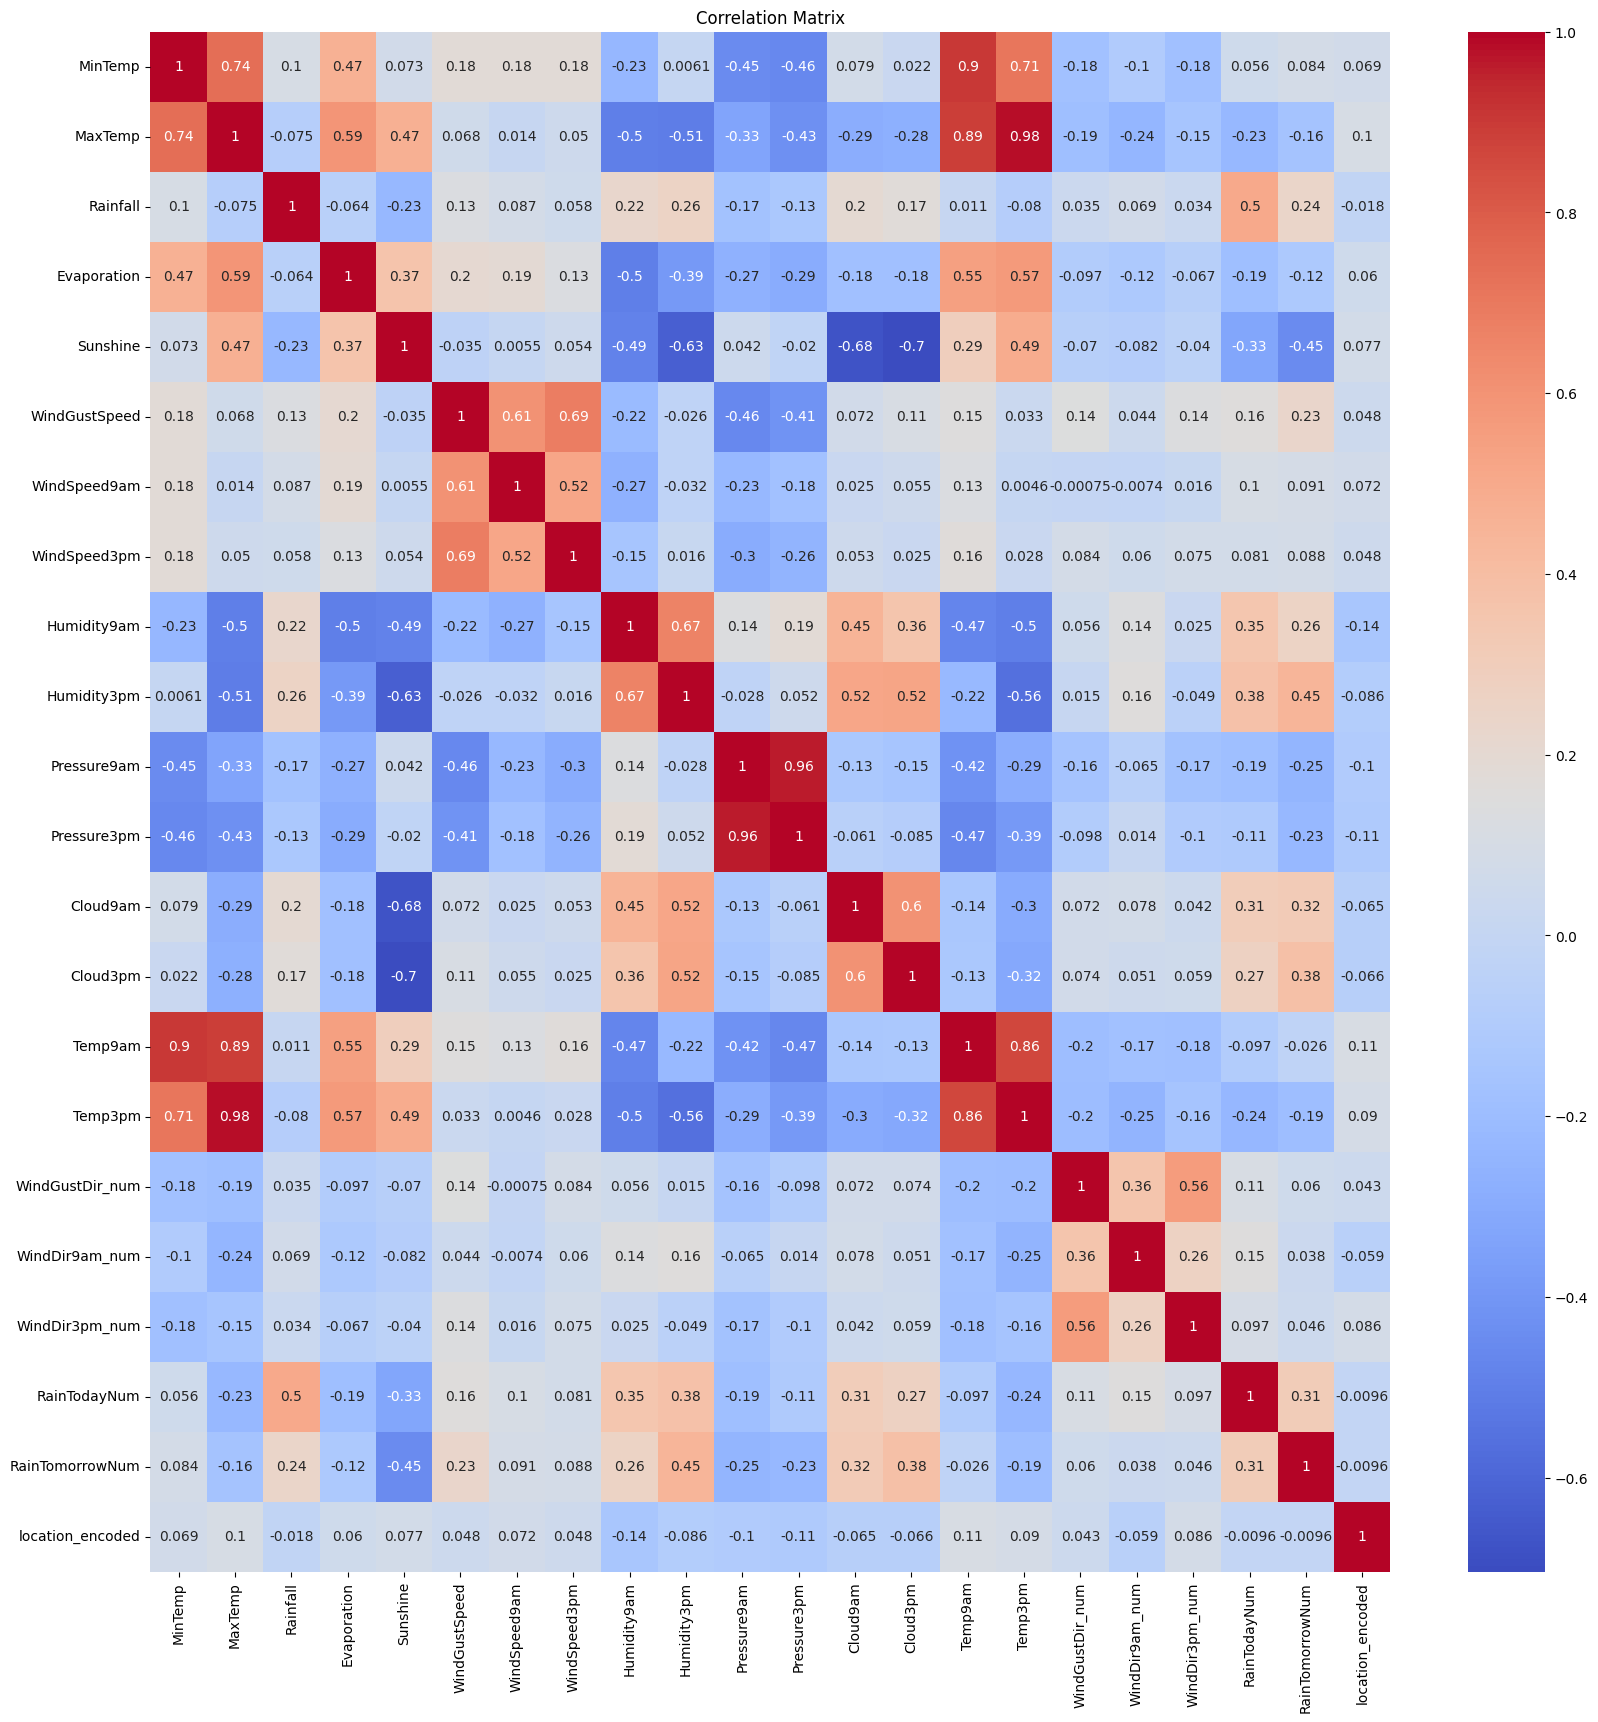

In [13]:
pearson_corr_heatmap(data_visualize)

**Spearman corelation**

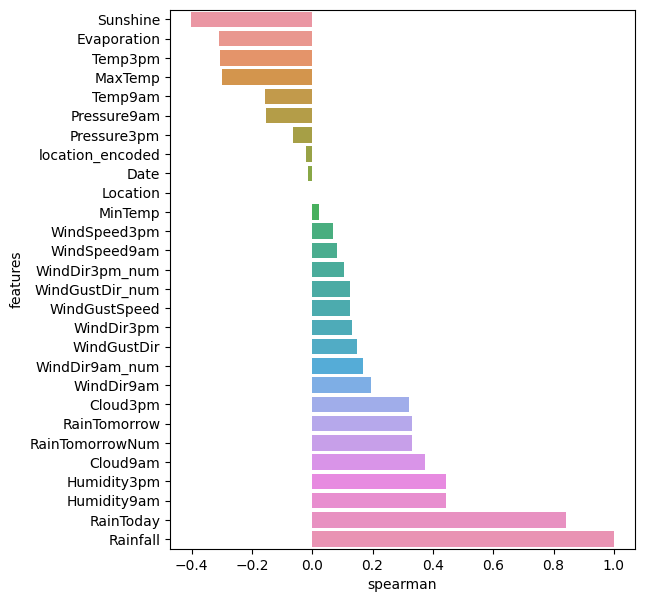

In [14]:
lis = actual_data.columns
lis = lis.delete(lis.get_loc('RainTodayNum'))
spearman_corr(actual_data[lis])

**Data loading, preprocessing, splitting and preparation for modeling.**

In [15]:
# Define a list of column names to select from the dataset
lis = ['Cloud3pm', 'Cloud9am','Humidity9am', 'Humidity3pm','Sunshine','Evaporation','Rainfall','RainToday']
data = actual_data[lis]

# Split the preprocessed data into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)

# # MISSING DATA HANDLING AND NULL VALUE REPLACEMENT
handled_train_data = replaceNullValAppropriately(train_df)
handled_test_data = replaceNullValAppropriately(test_df)
handled_train_data['RainToday'] = handled_train_data['RainToday'].ffill()

In [16]:
# CHECKING THE LENGTH OF SPLIT DATA
print(len(train_df))
print(len(test_df))
print(train_df['RainToday'])

101822
43638
141565     No
85325      No
17847     Yes
69746     Yes
98356     Yes
         ... 
110268     No
119879     No
103694     No
131932     No
121958     No
Name: RainToday, Length: 101822, dtype: object


### ***Decision Tree Classification model***

In [17]:
## imports for the decision tree

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

dt_classifier_with_parameters = DecisionTreeClassifier()
dt_classifier_with_parameters.fit(handled_train_data.iloc[:, :-1], handled_train_data['RainToday'])
# Get the column names of the training data
y_pred = dt_classifier_with_parameters.predict(handled_test_data.iloc[:, :-1])
# Creating predicted column to compare
handled_test_data['RainToday_pred_dt'] = y_pred


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate accuracy
accuracy = (handled_test_data['RainToday'] == handled_test_data['RainToday_pred_dt']).mean()
print("Accuracy:", accuracy)

# Handle NaN values in categorical columns using most frequent strategy
categorical_columns = ['RainToday']  # Specify the categorical column(s) here
categorical_imputer = SimpleImputer(strategy='most_frequent', fill_value='No')
handled_train_data['RainToday'] = categorical_imputer.fit_transform(handled_train_data['RainToday'].values.reshape(-1, 1)).flatten()
handled_test_data['RainToday'] = categorical_imputer.transform(handled_test_data['RainToday'].values.reshape(-1, 1)).flatten()

#label encoding
label_encoder = LabelEncoder()
handled_train_data['RainToday'] = label_encoder.fit_transform(handled_train_data['RainToday'])
handled_test_data['RainToday'] = label_encoder.transform(handled_test_data['RainToday'])
handled_test_data['RainToday_pred_dt'] = label_encoder.transform(handled_test_data['RainToday_pred_dt'])

precision = precision_score(handled_test_data['RainToday'], handled_test_data['RainToday_pred_dt'])

# Calculate recall
recall = recall_score(handled_test_data['RainToday'], handled_test_data['RainToday_pred_dt'])

# Calculate F1-score
f1 = f1_score(handled_test_data['RainToday'], handled_test_data['RainToday_pred_dt'])

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9746322012924515
Precision: 0.9824164524421594
Recall: 1.0
F1-score: 0.9911302453446755


Text(0.5, 23.52222222222222, 'Predicted label')

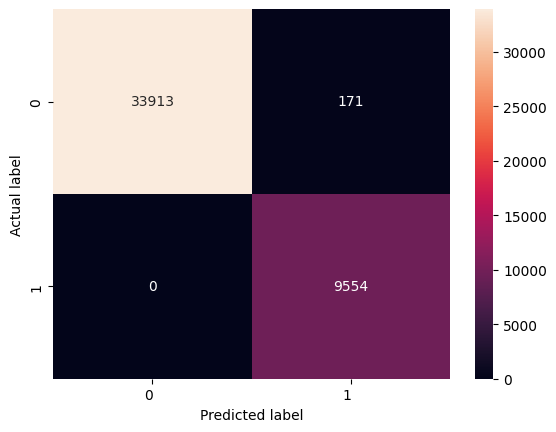

In [20]:
import seaborn as sns

conf_mat = confusion_matrix(handled_test_data['RainToday'],  handled_test_data['RainToday_pred_dt'])
df_conf_mat = pd.DataFrame(conf_mat)
heat_map = sns.heatmap(df_conf_mat, annot = True, fmt = 'd')
heat_map.yaxis.set_ticklabels(heat_map.yaxis.get_ticklabels(), ha = 'right')
heat_map.xaxis.set_ticklabels(heat_map.xaxis.get_ticklabels(), ha = 'right')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

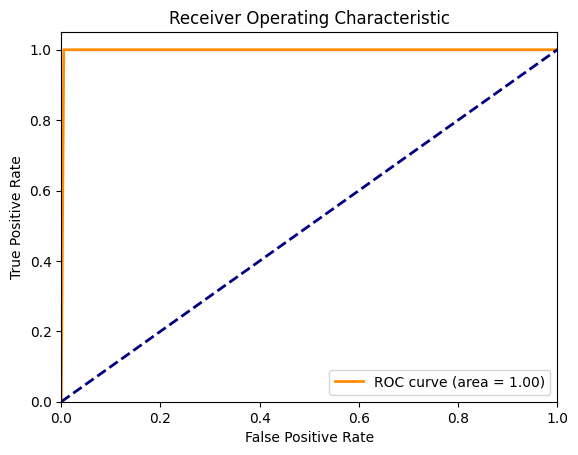

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute false positive rate (FPR), true positive rate (TPR), and AUC-ROC
fpr, tpr, thresholds = roc_curve(handled_test_data['RainToday'], handled_test_data['RainToday_pred_dt'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
# Define a list of column names to select from the dataset
lis = ['Cloud3pm', 'Cloud9am','Humidity9am', 'Humidity3pm','Sunshine','Evaporation','Rainfall','RainToday']
data = actual_data[lis]
# Split the preprocessed data into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)
# # MISSING DATA HANDLING AND NULL VALUE REPLACEMENT
handled_train_data = replaceNullValAppropriately(train_df)
handled_test_data = replaceNullValAppropriately(test_df)
handled_train_data['RainToday'] = handled_train_data['RainToday'].ffill()

In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

# Separate features and target in the training data
X = handled_train_data.iloc[:, :-1]
y = handled_train_data['RainToday']

# Create an instance of the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform grid search with cross-validation
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create an instance of the decision tree classifier with the best hyperparameters
dt_classifier_best = DecisionTreeClassifier(**best_params)
scoring = ['accuracy']
# Perform k-fold cross-validation
k = 5  # Define the number of folds
scores = cross_validate(dt_classifier_best, X, y, cv=k, scoring=scoring, return_train_score=True)

# Fit the classifier on the entire training data
dt_classifier_best.fit(X, y)

# Make predictions on the test data
y_pred = dt_classifier_best.predict(handled_test_data.iloc[:, :-1])

# Add predicted column to the test data
handled_test_data['RainToday_pred'] = y_pred

# Handle NaN values in categorical columns using most frequent strategy
categorical_columns = ['RainToday']  # Specify the categorical column(s) here
categorical_imputer = SimpleImputer(strategy='most_frequent', fill_value='No')
handled_train_data['RainToday'] = categorical_imputer.fit_transform(handled_train_data['RainToday'].values.reshape(-1, 1)).flatten()
handled_test_data['RainToday'] = categorical_imputer.transform(handled_test_data['RainToday'].values.reshape(-1, 1)).flatten()

#label encoding
label_encoder = LabelEncoder()
handled_train_data['RainToday'] = label_encoder.fit_transform(handled_train_data['RainToday'])
handled_test_data['RainToday'] = label_encoder.transform(handled_test_data['RainToday'])
handled_test_data['RainToday_pred'] = label_encoder.transform(handled_test_data['RainToday_pred'])

precision = precision_score(handled_test_data['RainToday'], handled_test_data['RainToday_pred'])

# Calculate recall
recall = recall_score(handled_test_data['RainToday'], handled_test_data['RainToday_pred'])

# Calculate F1-score
f1 = f1_score(handled_test_data['RainToday'], handled_test_data['RainToday_pred'])

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [36]:
print("test accuracy: ", scores['test_accuracy'].mean())
print("train accuracy: ",scores['train_accuracy'].mean())
print("test accuracy each folds: ", scores['test_accuracy'])
print("train accuracy each folds: ",scores['train_accuracy'])

test accuracy:  0.9950744478428272
train accuracy:  0.9950744493158261
test accuracy each folds:  [0.99526871 0.99486412 0.99526852 0.9951472  0.99482368]
train accuracy each folds:  [0.99502588 0.99512703 0.99502593 0.99505626 0.99513714]


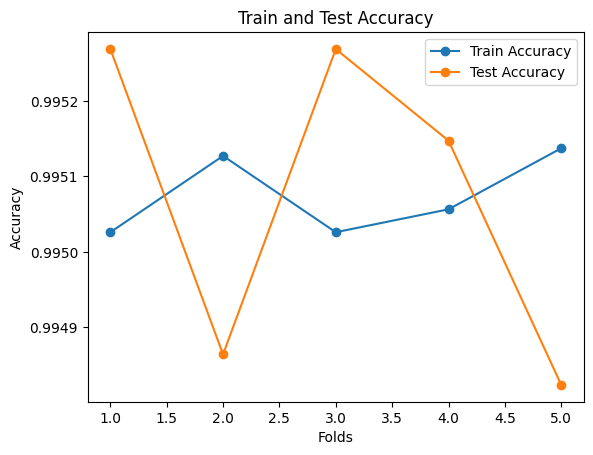

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sequence of epochs with a step of 0.5
epochs = np.arange(1, 6)

# Create a new figure and axes
fig, ax = plt.subplots()

# Plot train accuracy
ax.plot(epochs, scores['train_accuracy'], marker='o', linestyle='-', label='Train Accuracy')

# Plot test accuracy
ax.plot(epochs, scores['test_accuracy'], marker='o', linestyle='-', label='Test Accuracy')

# Set x-axis label
ax.set_xlabel('Folds')

# Set y-axis label
ax.set_ylabel('Accuracy')

# Set title
ax.set_title('Train and Test Accuracy')

# Set legend
ax.legend()

# Show the plot
plt.show()


Text(0.5, 23.52222222222222, 'Predicted label')

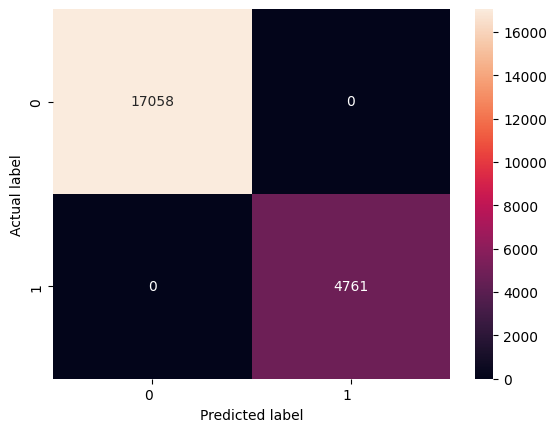

In [38]:
import seaborn as sns
import pandas as pd

conf_mat_dt_param = confusion_matrix(handled_test_data['RainToday'],  handled_test_data['RainToday_pred'])
df_conf_mat_dt_param = pd.DataFrame(conf_mat_dt_param)
heat_map_dt_param = sns.heatmap(df_conf_mat_dt_param, annot = True, fmt = 'd')
heat_map_dt_param.yaxis.set_ticklabels(heat_map_dt_param.yaxis.get_ticklabels(), ha = 'right')
heat_map_dt_param.xaxis.set_ticklabels(heat_map_dt_param.xaxis.get_ticklabels(), ha = 'right')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print(handled_test_data)

        Cloud3pm  Cloud9am  Humidity9am  Humidity3pm   Sunshine  Evaporation   
100721  5.000000  4.000000         73.0         64.0   8.000000          6.6  \
30234   1.000000  0.000000         61.0         22.0  10.900000          4.6   
68427   4.519462  4.429005         50.0         38.0   5.600000         11.0   
28624   4.519462  4.429005         99.0         51.0   7.618129          2.1   
31173   6.000000  7.000000         90.0         64.0   5.400000          1.2   
...          ...       ...          ...          ...        ...          ...   
274     1.000000  8.000000         96.0         58.0   7.618129          4.8   
115504  3.000000  1.000000         93.0         46.0   7.600000          4.8   
140985  7.000000  7.000000         89.0         71.0   1.400000          6.8   
145076  8.000000  8.000000        100.0         71.0   7.618129          4.8   
58736   7.000000  1.000000         82.0         64.0   7.618129          0.8   

        Rainfall  RainToday  RainToday_

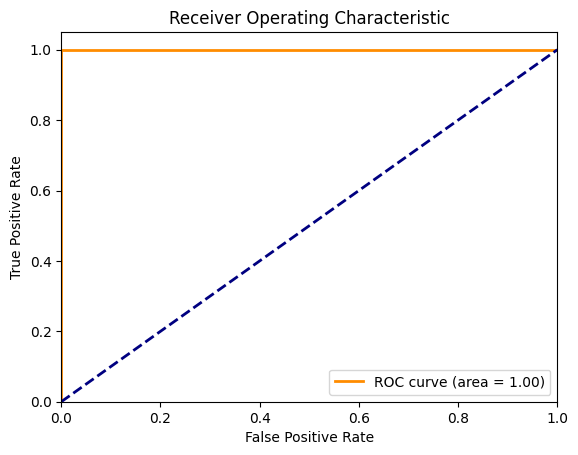

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute false positive rate (FPR), true positive rate (TPR), and AUC-ROC
fpr, tpr, thresholds = roc_curve(handled_test_data['RainToday'], handled_test_data['RainToday_pred'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 21819 samples in 0.006s...
[t-SNE] Computed neighbors for 21819 samples in 0.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21819
[t-SNE] Computed conditional probabilities for sample 2000 / 21819
[t-SNE] Computed conditional probabilities for sample 3000 / 21819
[t-SNE] Computed conditional probabilities for sample 4000 / 21819
[t-SNE] Computed conditional probabilities for sample 5000 / 21819
[t-SNE] Computed conditional probabilities for sample 6000 / 21819
[t-SNE] Computed conditional probabilities for sample 7000 / 21819
[t-SNE] Computed conditional probabilities for sample 8000 / 21819
[t-SNE] Computed conditional probabilities for sample 9000 / 21819
[t-SNE] Computed conditional probabilities for sample 10000 / 21819
[t-SNE] Computed conditional probabilities for sample 11000 / 21819
[t-SNE] Computed conditional probabilities for sample 12000 / 21819
[t-SNE] Computed conditional probabilities for sam

/tmp/ipykernel_8955/1389738105.py:25: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x="Sunshine", y="Humidity9am", hue="y_pred",


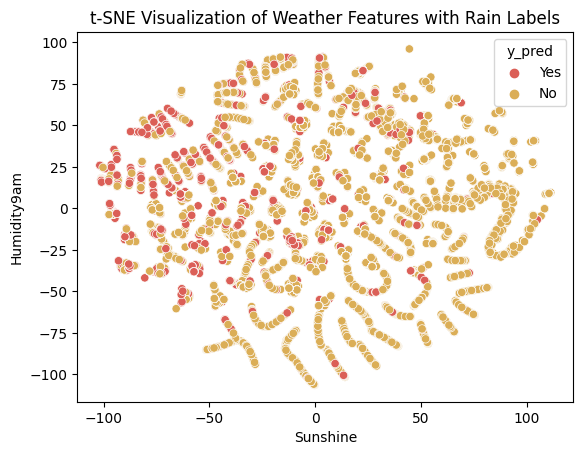

In [41]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns

# test_evaporation = handled_test_data['Evaporation']
# test_rainfall = handled_test_data['Rainfall']

# test_combined = np.column_stack((test_evaporation, test_rainfall))

test_sunshine = handled_test_data['Sunshine']  # Sunshine
test_humidity = handled_test_data['Humidity9am']  # Humidity9am

test_combined = np.column_stack((test_sunshine, test_humidity))

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(test_combined)
df = pd.DataFrame()
df["y_pred"] = y_pred.tolist()
df["Sunshine"] = z[:, 0]
df["Humidity9am"] = z[:, 1]

sns.scatterplot(x="Sunshine", y="Humidity9am", hue="y_pred",
                palette=sns.color_palette("hls", 10),
                data=df).set(title="t-SNE Visualization of Weather Features with Rain Labels")

plt.show()

In [42]:
# Define a list of column names to select from the dataset
lis = ['Cloud3pm', 'Cloud9am','Humidity9am', 'Humidity3pm','Sunshine','Evaporation','Rainfall','RainToday']
data = actual_data[lis]
# Split the preprocessed data into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)
# # MISSING DATA HANDLING AND NULL VALUE REPLACEMENT
handled_train_data = replaceNullValAppropriately(train_df)
handled_test_data = replaceNullValAppropriately(test_df)
handled_train_data['RainToday'] = handled_train_data['RainToday'].ffill()

### ***Semi-supervised Learning with Decision Trees***

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

def split_data(dataset):
    train_df, test_df = train_test_split(dataset, test_size=0.15, random_state=42)
    handled_train_data = replaceNullValAppropriately(train_df)
    handled_test_data = replaceNullValAppropriately(test_df)
    handled_train_data['RainToday'] = handled_train_data['RainToday'].ffill()
    return handled_train_data

desired_accuracy = 0.974
current_accuracy_total = 0
current_accuracy = 0
iteration = 0

lis = ['Cloud3pm', 'Cloud9am', 'Humidity9am', 'Humidity3pm', 'Sunshine', 'Evaporation', 'Rainfall', 'RainToday']
data = actual_data[lis]
train_df, test_df = train_test_split(data, test_size=0.15, random_state=42)
handled_train_data = replaceNullValAppropriately(train_df)
handled_test_data = replaceNullValAppropriately(test_df)
handled_train_data['RainToday'] = handled_train_data['RainToday'].ffill()
trained_data = handled_train_data

train_accuracies = []
test_accuracies = []

while current_accuracy_total < desired_accuracy:

    #replace = False, is to get 20% unique labelled data everytime from trained data set
    labeled_idx = np.random.choice(len(trained_data), size=int(len(trained_data) * 0.2),replace=False)
    labeled_data = trained_data.iloc[labeled_idx]

    # Get unlabeled data
    unlabeled_idx = np.setdiff1d(np.arange(len(trained_data)), labeled_idx)
    unlabeled_data = trained_data.iloc[unlabeled_idx]

    # Train a supervised learning model on the labeled data
    dt_classifier = DecisionTreeClassifier()

    # Fit the model on the labeled data
    dt_classifier.fit(labeled_data.iloc[:, :-1], labeled_data['RainToday'])

    # Use the trained model to predict the labels for the unlabeled data
    pseudo_labels = dt_classifier.predict(unlabeled_data.iloc[:, :-1])

    # Check the probability estimates of the model on the unlabeled data
    probas = dt_classifier.predict_proba(unlabeled_data.iloc[:, :-1])
    high_confidence_idx = np.where(np.max(probas, axis=1) >= 0.85)[0]
    high_confidence_labels = pseudo_labels[high_confidence_idx]
    high_confidence_data = unlabeled_data.iloc[high_confidence_idx, :-1]

    # Mix the labeled data with the high-confidence pseudo-labeled data and retrain the model
    mixed_labeled_data = pd.concat([labeled_data.iloc[:, :-1], high_confidence_data])
    mixed_labels = np.concatenate([labeled_data['RainToday'], high_confidence_labels])
    dt_classifier.fit(mixed_labeled_data, mixed_labels)
    # Make predictions on the testing data
    y_pred = dt_classifier.predict(handled_test_data.iloc[:, :-1])
    current_accuracy = (handled_test_data['RainToday'] == y_pred).mean()
    iteration += 1
    print(f"Iteration {iteration}: Accuracy = {current_accuracy}")
    train_accuracies.append(dt_classifier.score(handled_train_data.iloc[:, :-1], handled_train_data['RainToday']))
    current_accuracy_total = current_accuracy
    test_accuracies.append(current_accuracy)

    mixed_labels_df = pd.DataFrame(mixed_labels, columns=['RainToday'])
    mixed_labeled_data['RainToday'] = mixed_labels_df['RainToday'].values
    trained_data = mixed_labeled_data.dropna()

    trained_data = split_data(trained_data)

print(f"Desired accuracy {desired_accuracy} achieved!")

handled_test_data['RainToday_pred_dt_semi'] = y_pred

categorical_columns = ['RainToday']
categorical_imputer = SimpleImputer(strategy='most_frequent', fill_value='No')
handled_train_data['RainToday'] = categorical_imputer.fit_transform(handled_train_data['RainToday'].values.reshape(-1, 1)).flatten()
handled_test_data['RainToday'] = categorical_imputer.transform(handled_test_data['RainToday'].values.reshape(-1, 1)).flatten()

label_encoder = LabelEncoder()
handled_train_data['RainToday'] = label_encoder.fit_transform(handled_train_data['RainToday'])
handled_test_data['RainToday'] = label_encoder.transform(handled_test_data['RainToday'])
handled_test_data['RainToday_pred_dt_semi'] = label_encoder.transform(handled_test_data['RainToday_pred_dt_semi'])

precision = precision_score(handled_test_data['RainToday'], handled_test_data['RainToday_pred_dt_semi'])
recall = recall_score(handled_test_data['RainToday'], handled_test_data['RainToday_pred_dt_semi'])
f1 = f1_score(handled_test_data['RainToday'], handled_test_data['RainToday_pred_dt_semi'])

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Iteration 1: Accuracy = 0.9732343370456941
Iteration 2: Accuracy = 0.9719052202209084
Iteration 3: Accuracy = 0.9709885879279527
Iteration 4: Accuracy = 0.9702552820935881
Iteration 5: Accuracy = 0.9714469040744306
Iteration 6: Accuracy = 0.9708510930840093
Iteration 7: Accuracy = 0.9703011137082359
Iteration 8: Accuracy = 0.971126082771896
Iteration 9: Accuracy = 0.9714469040744306
Iteration 10: Accuracy = 0.970942756313305
Iteration 11: Accuracy = 0.9709885879279527
Iteration 12: Accuracy = 0.9719510518355562
Iteration 13: Accuracy = 0.9725468628259774
Iteration 14: Accuracy = 0.9729135157431597
Iteration 15: Accuracy = 0.9738759796507631
Iteration 16: Accuracy = 0.9738301480361153
Iteration 17: Accuracy = 0.9742426325679454
Desired accuracy 0.974 achieved!
Precision: 0.9855102463258124
Recall: 1.0
F1-score: 0.9927022518765638


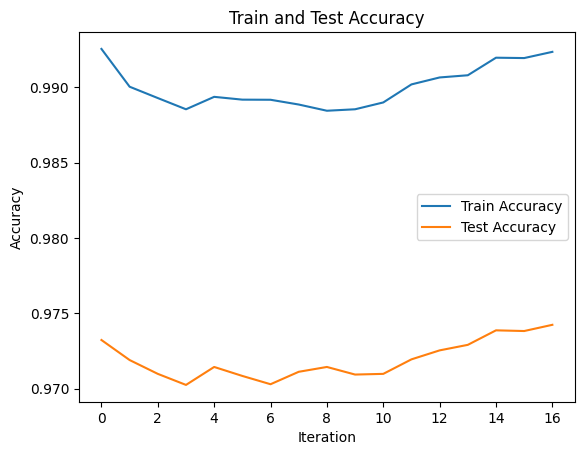

In [44]:
# Plot train and test accuracy
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

Text(0.5, 23.52222222222222, 'Predicted label')

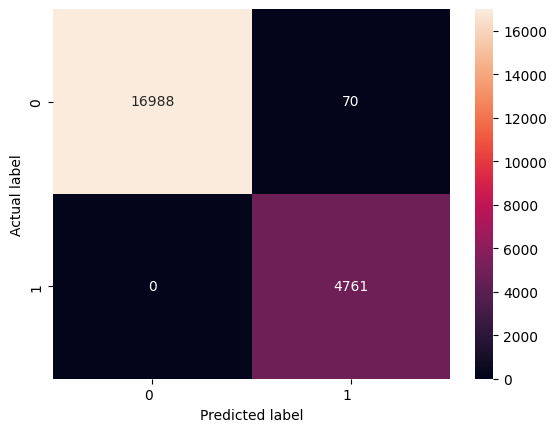

In [45]:
import seaborn as sns

conf_mat_dt_semi = confusion_matrix(handled_test_data['RainToday'],  handled_test_data['RainToday_pred_dt_semi'])
df_conf_mat_dt_semi = pd.DataFrame(conf_mat_dt_semi)
heat_map_dt_semi = sns.heatmap(df_conf_mat_dt_semi, annot = True, fmt = 'd')
heat_map_dt_semi.yaxis.set_ticklabels(heat_map_dt_semi.yaxis.get_ticklabels(), ha = 'right')
heat_map_dt_semi.xaxis.set_ticklabels(heat_map_dt_semi.xaxis.get_ticklabels(), ha = 'right')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

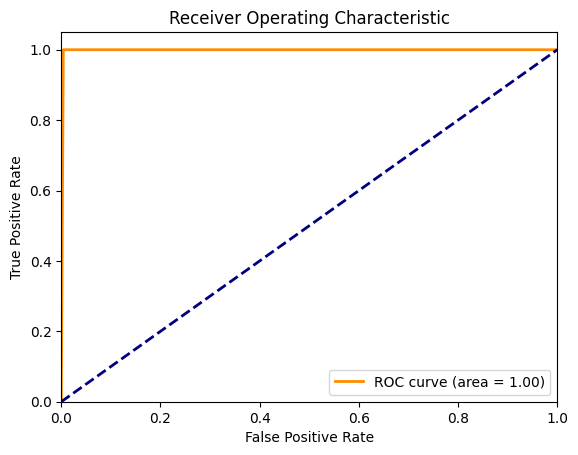

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute false positive rate (FPR), true positive rate (TPR), and AUC-ROC
fpr, tpr, thresholds = roc_curve(handled_test_data['RainToday'], handled_test_data['RainToday_pred_dt_semi'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Predicted data [1 0 0 ... 1 1 0]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 21819 samples in 0.007s...
[t-SNE] Computed neighbors for 21819 samples in 0.268s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21819
[t-SNE] Computed conditional probabilities for sample 2000 / 21819
[t-SNE] Computed conditional probabilities for sample 3000 / 21819
[t-SNE] Computed conditional probabilities for sample 4000 / 21819
[t-SNE] Computed conditional probabilities for sample 5000 / 21819
[t-SNE] Computed conditional probabilities for sample 6000 / 21819
[t-SNE] Computed conditional probabilities for sample 7000 / 21819
[t-SNE] Computed conditional probabilities for sample 8000 / 21819
[t-SNE] Computed conditional probabilities for sample 9000 / 21819
[t-SNE] Computed conditional probabilities for sample 10000 / 21819
[t-SNE] Computed conditional probabilities for sample 11000 / 21819
[t-SNE] Computed conditional probabilities for sample 12000 / 21819
[t-SNE] Computed 

/tmp/ipykernel_8955/173782449.py:31: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x="Sunshine", y="Humidity9am", hue="y_pred",


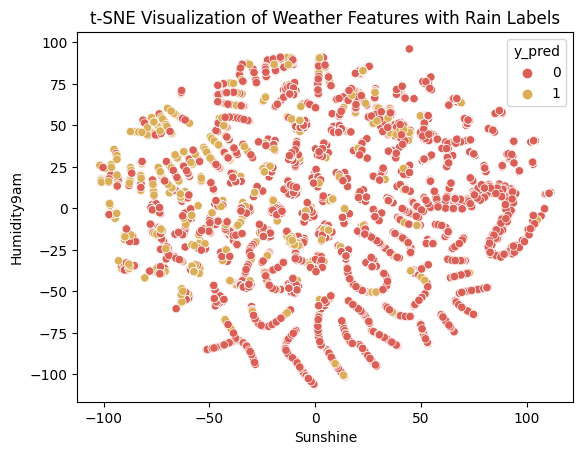

In [47]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns


test_sunshine = handled_test_data['Sunshine']  # Sunshine
test_humidity = handled_test_data['Humidity9am']  # Humidity9am

test_combined = np.column_stack((test_sunshine, test_humidity))

# Convert string labels to numeric values
label_encoder = LabelEncoder()
y_pred_numeric = label_encoder.fit_transform(y_pred)

print("Predicted data", y_pred_numeric)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(test_combined)
df = pd.DataFrame()
df["y_pred"] = y_pred_numeric.tolist()
df["Sunshine"] = z[:, 0]
df["Humidity9am"] = z[:, 1]

sns.scatterplot(x="Sunshine", y="Humidity9am", hue="y_pred",
                palette=sns.color_palette("hls", 10),
                data=df).set(title="t-SNE Visualization of Weather Features with Rain Labels")

plt.show()

### ***Neural networks (RNN)***

In [48]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from torch import nn, optim
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
import torch.nn.functional as func
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [49]:
#load the dataset
data_visualize = pd.read_csv('weatherAUS.csv')
check_missing_value(data_visualize)
data_visualize['RainToday'].value_counts()/len(data_visualize)
actual_data=data_visualize

Summary Statistics:
+---------------+---------+------------+----------+-------+--------+--------+--------+--------+
|               |   count |       mean |      std |   min |    25% |    50% |    75% |    max |
|---------------+---------+------------+----------+-------+--------+--------+--------+--------|
| MinTemp       |  143975 |   12.194   |  6.39849 |  -8.5 |    7.6 |   12   |   16.9 |   33.9 |
| MaxTemp       |  144199 |   23.2213  |  7.11905 |  -4.8 |   17.9 |   22.6 |   28.2 |   48.1 |
| Rainfall      |  142199 |    2.36092 |  8.47806 |   0   |    0   |    0   |    0.8 |  371   |
| Evaporation   |   82670 |    5.46823 |  4.1937  |   0   |    2.6 |    4.8 |    7.4 |  145   |
| Sunshine      |   75625 |    7.61118 |  3.78548 |   0   |    4.8 |    8.4 |   10.6 |   14.5 |
| WindGustSpeed |  135197 |   40.0352  | 13.6071  |   6   |   31   |   39   |   48   |  135   |
| WindSpeed9am  |  143693 |   14.0434  |  8.91538 |   0   |    7   |   13   |   19   |  130   |
| WindSpeed3pm  |  1

In [50]:
#splitting data in train and test sets
lis = ['Cloud3pm', 'Cloud9am', 'Humidity9am', 'Humidity3pm', 'Sunshine', 'Evaporation', 'Rainfall', 'RainToday']
data = actual_data[lis]
train_df, test_df = train_test_split(data, test_size=0.3, random_state=42)

# Handle NaN values in categorical columns using most frequent strategy
categorical_columns = ['RainToday']  # Specify the categorical column(s) here
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_df['RainToday'] = categorical_imputer.fit_transform(train_df['RainToday'].values.reshape(-1, 1)).flatten()
test_df['RainToday'] = categorical_imputer.transform(test_df['RainToday'].values.reshape(-1, 1)).flatten()

handled_train_data = replaceNullValAppropriately(train_df)
handled_test_data = replaceNullValAppropriately(test_df)
# handled_train_data['RainToday'] = handled_train_data['RainToday'].ffill()

#label encoding
label_encoder = LabelEncoder()
handled_train_data['RainToday'] = label_encoder.fit_transform(handled_train_data['RainToday'])
handled_test_data['RainToday'] = label_encoder.transform(handled_test_data['RainToday'])

#converting it to Tensors
handled_train_data = torch.from_numpy(handled_train_data.to_numpy())
handled_test_data = torch.from_numpy(handled_test_data.to_numpy())

print(handled_train_data.shape)
print(handled_test_data.shape)

torch.Size([101822, 8])
torch.Size([43638, 8])


In [51]:
class Model(nn.Module):
    def __init__(self, n_features):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(n_features, 16)
        self.bn1 = nn.BatchNorm1d(16)
        self.fc2 = nn.Linear(16, 10)
        self.bn2 = nn.BatchNorm1d(10)
        self.fc3 = nn.Linear(10, 4)
        self.bn3 = nn.BatchNorm1d(4)
        self.fc4 = nn.Linear(4, 1)

    def forward(self, x):
        x = func.relu(self.bn1(self.fc1(x)))
        x = func.relu(self.bn2(self.fc2(x)))
        x = func.relu(self.bn3(self.fc3(x)))
        return torch.sigmoid(self.fc4(x))

model = Model(handled_train_data.shape[1])

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [52]:
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [53]:
def round_tensor(t, decimal_places = 3):
  return round(t.item(), decimal_places)

In [54]:
# !pip install thop


In [55]:
import matplotlib.pyplot as plt
import torch
from thop import profile

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Calculate FLOPs
input_data = handled_train_data.float()
flops, params = profile(model, inputs=(input_data,), verbose=False)
print(f"Total FLOPs: {flops}")


# run the model
i = 0
for epoch in range(300):
    y_pred = model(handled_train_data.float())
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, handled_train_data[:, -1].float())
    if epoch % 50 == 0:
        train_acc = calculate_accuracy(handled_train_data[:, -1].float(), y_pred)
        y_test_pred = model(handled_test_data.float())
        y_test_pred = torch.squeeze(y_test_pred)
        test_loss = criterion(y_test_pred, handled_test_data[:, -1].float())
        test_acc = calculate_accuracy(handled_test_data[:, -1].float(), y_test_pred)

        train_losses.append(train_loss.item())
        train_accuracies.append(train_acc.item())
        test_losses.append(test_loss.item())
        test_accuracies.append(test_acc.item())

        print(f"epoch {i} Train set: loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)} Test set: loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}")
        i+=1

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

Total FLOPs: 46023544.0
epoch 0 Train set: loss: 0.612, accuracy: 0.781 Test set: loss: 0.612, accuracy: 0.781
epoch 1 Train set: loss: 0.53, accuracy: 0.823 Test set: loss: 0.53, accuracy: 0.823
epoch 2 Train set: loss: 0.442, accuracy: 0.883 Test set: loss: 0.442, accuracy: 0.882
epoch 3 Train set: loss: 0.354, accuracy: 0.961 Test set: loss: 0.354, accuracy: 0.964
epoch 4 Train set: loss: 0.281, accuracy: 0.996 Test set: loss: 0.281, accuracy: 0.996
epoch 5 Train set: loss: 0.223, accuracy: 1.0 Test set: loss: 0.223, accuracy: 1.0


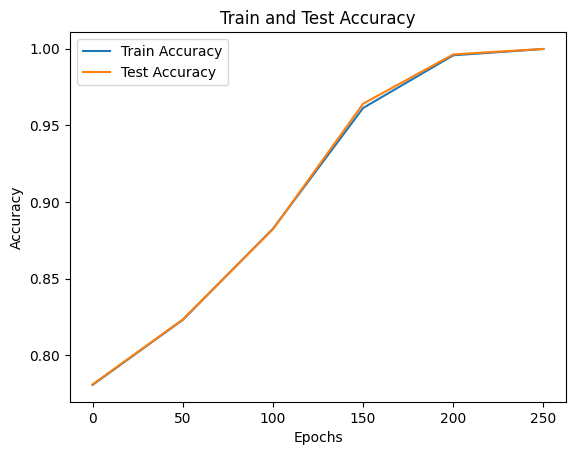

In [56]:
# accuracy graphs
epochs = range(0, 300, 50)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import classification_report

y_pred = model(handled_test_data.float())
y_pred = y_pred.ge(.5).view(-1)

y_pred = y_pred.detach().numpy()
true_labels = handled_test_data[:, -1].numpy()

class_names = ['No rain', 'Raining']

report = classification_report(true_labels, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

     No rain       1.00      1.00      1.00     34084
     Raining       1.00      1.00      1.00      9554

    accuracy                           1.00     43638
   macro avg       1.00      1.00      1.00     43638
weighted avg       1.00      1.00      1.00     43638



Text(0.5, 23.52222222222222, 'Predicted label')

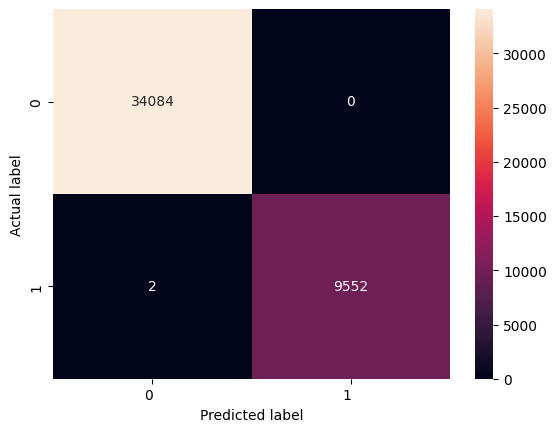

In [58]:
conf_mat_nn = confusion_matrix(handled_test_data[:, -1], y_pred)
df_conf_mat_nn = pd.DataFrame(conf_mat_nn)
heat_map_nn = sns.heatmap(df_conf_mat_nn, annot = True, fmt = 'd')
heat_map_nn.yaxis.set_ticklabels(heat_map_nn.yaxis.get_ticklabels(), ha = 'right')
heat_map_nn.xaxis.set_ticklabels(heat_map_nn.xaxis.get_ticklabels(), ha = 'right')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

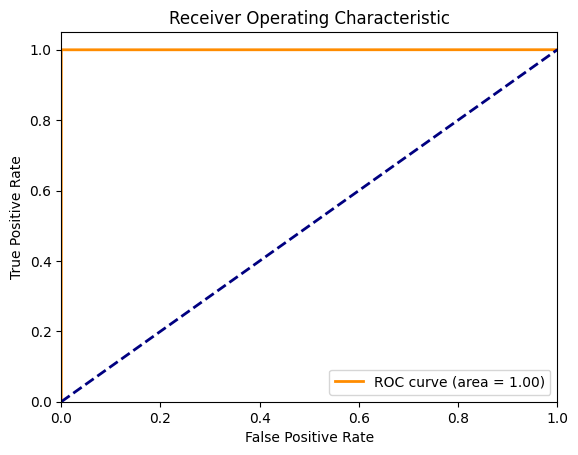

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute false positive rate (FPR), true positive rate (TPR), and AUC-ROC
fpr, tpr, thresholds = roc_curve(handled_test_data[:, -1], y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

handled test data: (43638, 8)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 43638 samples in 0.012s...
[t-SNE] Computed neighbors for 43638 samples in 0.547s...
[t-SNE] Computed conditional probabilities for sample 1000 / 43638
[t-SNE] Computed conditional probabilities for sample 2000 / 43638
[t-SNE] Computed conditional probabilities for sample 3000 / 43638
[t-SNE] Computed conditional probabilities for sample 4000 / 43638
[t-SNE] Computed conditional probabilities for sample 5000 / 43638
[t-SNE] Computed conditional probabilities for sample 6000 / 43638
[t-SNE] Computed conditional probabilities for sample 7000 / 43638
[t-SNE] Computed conditional probabilities for sample 8000 / 43638
[t-SNE] Computed conditional probabilities for sample 9000 / 43638
[t-SNE] Computed conditional probabilities for sample 10000 / 43638
[t-SNE] Computed conditional probabilities for sample 11000 / 43638
[t-SNE] Computed conditional probabilities for sample 12000 / 43638
[t-SNE] Computed con

/tmp/ipykernel_8955/519424247.py:22: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x="Sunshine", y="Humidity9am", hue="y_pred",


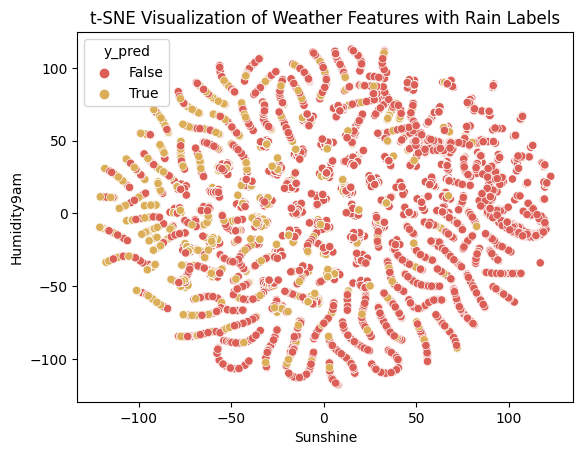

In [60]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns

print("handled test data:", handled_test_data.cpu().numpy().shape)

test_sunshine = handled_test_data[:, 4]  # Sunshine
test_humidity = handled_test_data[:, 2]  # Humidity9am

test_combined = np.column_stack((test_sunshine, test_humidity))

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(test_combined)
df = pd.DataFrame()
df["y_pred"] = y_pred.tolist()
df["Sunshine"] = z[:, 0]
df["Humidity9am"] = z[:, 1]

sns.scatterplot(x="Sunshine", y="Humidity9am", hue="y_pred",
                palette=sns.color_palette("hls", 10),
                data=df).set(title="t-SNE Visualization of Weather Features with Rain Labels")

plt.show()